In [34]:
#!git clone https://github.com/lrburle/ML_Assignment3.git

fatal: destination path 'ML_Assignment2' already exists and is not an empty directory.


# Assignment 3 - Landon Burleson 
## Problem 1


In [1]:
#Adding in the necessary modules needed to complete Assignment 3
import numpy as np
import matplotlib.pyplot as plt
import sys
import tensorflow as tf
from tensorflow import keras
 
# adding the subfolder to the path.
# sys.path.insert(0, './ML_Assignment3')

In [6]:
#Pulling in the MNIST test data.
mnist = keras.datasets.mnist
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data() 

x_train = x_train_full
y_train = y_train_full

# #Splits the dataset for validation and training datasets. 
# x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
# y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [7]:
cnn_model1 = keras.models.Sequential([
    #Convolution front end.
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape = [28, 28, 1], name="conv1"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool1"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv2"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv3"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool2"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv4"), 
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv5"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool3"),
    keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same", name="conv6"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool4"),

	#Deep learning layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", name="deep1"), #Dense layers can be atributed to a 'regular' hidden layer of neurons
    keras.layers.Dense(10, activation="softmax", name="deep2") 
])

#Shows the whole network topology for the compiled CNN
cnn_model1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Compiling the model with a loss, optimizer, and other metrics
cnn_model1.summary()

#Training the network.
history1 = cnn_model1.fit(x_train, y_train, epochs=25)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 32)        320       
                                                                 
 maxpool1 (MaxPooling2D)     (None, 14, 14, 32)        0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 64)        18496     
                                                                 
 conv3 (Conv2D)              (None, 14, 14, 64)        36928     
                                                                 
 maxpool2 (MaxPooling2D)     (None, 7, 7, 64)          0         
                                                                 
 conv4 (Conv2D)              (None, 7, 7, 128)         73856     
                                                                 
 conv5 (Conv2D)              (None, 7, 7, 128)        

In [8]:
#Creating the sequential model for a the number of filters decreasing as the layers increase
cnn_model2 = keras.models.Sequential([
    #Convolution front end.
    keras.layers.Conv2D(256, (3, 3), activation="relu", padding="same", input_shape = [28, 28, 1], name="conv1"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool1"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv2"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv3"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool2"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv4"), 
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv5"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool4"),
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", name="conv6"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool5"),

	#Deep learning layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", name="deep1"), #Dense layers can be atributed to a 'regular' hidden layer of neurons
    keras.layers.Dense(10, activation="softmax", name="deep2") 
])

#Shows the whole network topology for the compiled CNN
cnn_model2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#Compiling the model with a loss, optimizer, and other metrics
cnn_model2.summary()

#Training the network.
history2 = cnn_model2.fit(x_train, y_train, epochs=25)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 28, 28, 256)       2560      
                                                                 
 maxpool1 (MaxPooling2D)     (None, 14, 14, 256)       0         
                                                                 
 conv2 (Conv2D)              (None, 14, 14, 128)       295040    
                                                                 
 conv3 (Conv2D)              (None, 14, 14, 128)       147584    
                                                                 
 maxpool2 (MaxPooling2D)     (None, 7, 7, 128)         0         
                                                                 
 conv4 (Conv2D)              (None, 7, 7, 64)          73792     
                                                                 
 conv5 (Conv2D)              (None, 7, 7, 64)         

In [14]:
#Creating the sequential model for a the number of filters decreasing as the layers increase
cnn_model3 = keras.models.Sequential([
    #Convolution front end.
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape = [28, 28, 1], name="conv1"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool1"),
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv2"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv3"),
    keras.layers.MaxPooling2D((2, 2), name="maxpool2"),
    keras.layers.Conv2D(128, (3, 3), activation="relu", padding="same", name="conv6"), 
    keras.layers.Conv2D(64, (3, 3), activation="relu", padding="same", name="conv7"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool4"),
    keras.layers.Conv2D(32, (3, 3), activation="relu", padding="same", name="conv8"), 
    keras.layers.MaxPooling2D((2, 2), name="maxpool5"),

	#Deep learning layers
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu", name="deep1"), #Dense layers can be atributed to a 'regular' hidden layer of neurons
    keras.layers.Dense(10, activation="softmax", name="deep2") 
])

#Shows the whole network topology for the compiled CNN
opt = keras.optimizers.Adam(lr=0.1)
cnn_model3.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
#Compiling the model with a loss, optimizer, and other metrics
cnn_model3.summary()

#Training the network.
history3 = cnn_model2.fit(x_train, y_train, epochs=25)

TypeError: Invalid keyword argument(s) in `compile()`: ({'learning_rate'},). Valid keyword arguments include "cloning", "experimental_run_tf_function", "distribute", "target_tensors", or "sample_weight_mode".

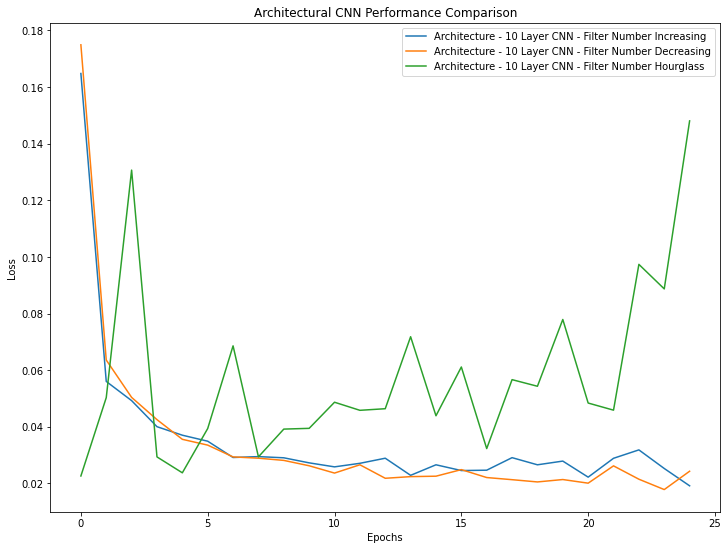

In [13]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("Architectural CNN Performance Comparison")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.plot(history3.history['loss'])
plt.legend(['Architecture - 10 Layer CNN - Filter Number Increasing', 'Architecture - 10 Layer CNN - Filter Number Decreasing', 'Architecture - 10 Layer CNN - Filter Number Hourglass'], loc='upper right')
plt.show()

## Problem 2

The following code demonstrates the LaNet7 architecture in tensorflow using the MNIST dataset. 

In [3]:
#Pulling in the MNIST test data.
cifar10 = keras.datasets.cifar10
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data() 

x_train = x_train_full
y_train = y_train_full
# #Splits the dataset for validation and training datasets. 
# x_valid, x_train = x_train_full[:5000] / 255.0, x_train_full[5000:] / 255.0
# y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [4]:
# Building the LeNet model in keras
lanet = keras.models.Sequential([
    keras.layers.Conv2D(6, (5, 5), padding='same', input_shape = [32, 32, 3], activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    keras.layers.Conv2D(16, (5, 5), strides=(1, 1), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2)),
    keras.layers.Conv2D(120, (5, 5), padding='same', activation='relu'),

    keras.layers.Flatten(),
    keras.layers.Dense(84, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

#Compiling the model with a loss, optimizer, and other metrics
lanet.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

#Shows the whole network topology for the compiled CNN
lanet.summary()

#Training the network.
history4 = lanet.fit(x_train, y_train, epochs=25)


2022-10-27 20:44:28.229926: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-27 20:44:28.240121: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-27 20:44:28.240451: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:925] could not open file to read NUMA node: /sys/bus/pci/devices/0000:0b:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-10-27 20:44:28.241135: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 6)         456       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 16)        2416      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 16)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 120)         48120     
                                                                 
 flatten (Flatten)           (None, 7680)              0

2022-10-27 20:44:31.289899: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8600
2022-10-27 20:44:32.287517: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: Permission denied
2022-10-27 20:44:32.322544: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: Permission denied
2022-10-27 20:44:32.322589: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Couldn't invoke ptxas --version
2022-10-27 20:44:32.359109: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: Permission denied
2022-10-27 20:44:32.359202: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: Failed to launch ptxas
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-10-27 20:44:32.433983: I tensorflow/stream_executor/cuda/cuda_blas.cc:1774] Tensor

1563/1563 [==============================] - 11s 5ms/step - loss: 1.7554 - accuracy: 0.3900
Epoch 2/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.3943 - accuracy: 0.5038
Epoch 3/25
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2540 - accuracy: 0.5568
Epoch 4/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1403 - accuracy: 0.5976
Epoch 5/25
1563/1563 [==============================] - 7s 4ms/step - loss: 1.0417 - accuracy: 0.6314
Epoch 6/25
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9464 - accuracy: 0.6659
Epoch 7/25
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8535 - accuracy: 0.6992
Epoch 8/25
1563/1563 [==============================] - 9s 5ms/step - loss: 0.7662 - accuracy: 0.7307
Epoch 9/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6945 - accuracy: 0.7536
Epoch 10/25
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6165 - accur

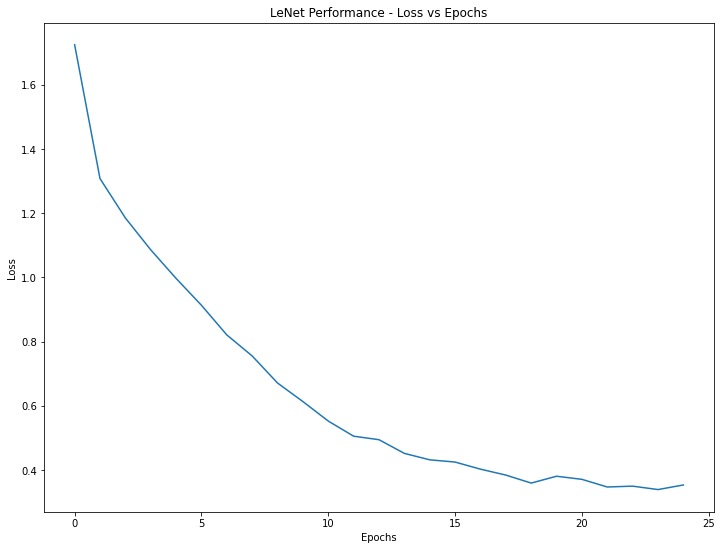

In [7]:
# Show the Loss vs Epochs for each architecture.
plt.figure(figsize=[12, 9])
plt.title("LeNet Performance - Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(history4.history['loss'])
plt.show()

***

# Problem 3

In [28]:
X = np.array([[7, 5, 0, 0, 3, 2], [6, 4, 5, 1, 4, 8], [9, 0, 2, 2, 5, 4],  [6, 3, 4, 7, 9, 8], [5, 7, 5, 6, 9, 0], [7, 9, 0, 8, 2, 3]])
f = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])

[a, b] = X.shape
y = np.zeros((a-2, b-2))

#Algorithm for manual convolution:
for i in range(1, X.shape[0]-1):
	for j in range(1, X.shape[1]-1):
		x = X[(i-1):(i+2), (j-1):(j+2)]
		s = np.add(f, x)
		y[i-1, j-1] = s.sum()

print('Output of the convolution between the X and f matrices shown above is shown below:')
print(y)

Output of the convolution between the X and f matrices shown above is shown below:
[[38. 19. 22. 29.]
 [39. 28. 39. 48.]
 [41. 36. 49. 50.]
 [46. 49. 50. 52.]]


In [33]:
# The following is the max pooling operation performed on the above output. 
o = np.zeros((2, 2))

o[0, 0] = np.max(y[0:2, 0:2])
o[1, 0] = np.max(y[2:4, 0:2])
o[0, 1] = np.max(y[0:2, 2:4])
o[1, 1] = np.max(y[2:4, 2:4])

print('Output of the max pooling operation.')
print(o)

Output of the max pooling operation.
[[39. 48.]
 [49. 52.]]


The following are responses to the Problem 3 questions. 
1. The dimensions of the input and kernel are 6x6x1 and 3x3x1 respectively. The number of parameters
   is ((3x3x1)+1)x1 = 10 
2. The output activation map is shown above. The dimensions 4x4x1. 
3. See the output of the max pooling using a stride of (2,2) and a filter size of (2,2) with no
   padding. 